In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Load dataset
file_path = r"C:\Users\USer\OneDrive - Hashemite University\Desktop\self devlompent\sitech ass\linear regression project\student_performance.csv"
df = pd.read_csv(file_path)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


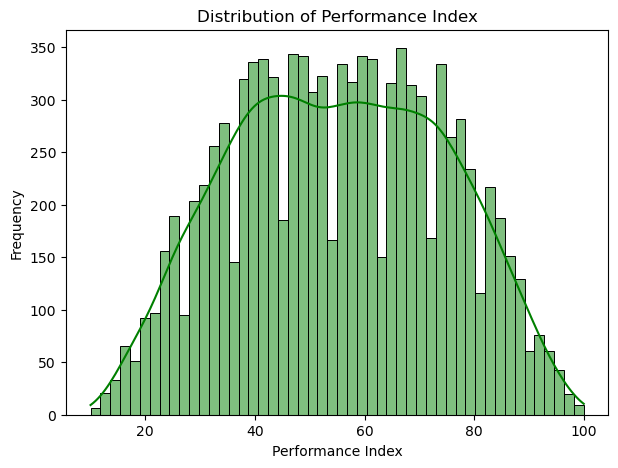

In [5]:
# Distribution of Performance Index
plt.figure(figsize=(7,5))
sns.histplot(df['Performance Index'], kde=True, bins=50, color="green")
plt.title("Distribution of Performance Index")
plt.xlabel("Performance Index")
plt.ylabel("Frequency")
plt.show()

In [6]:
import plotly.express as px

fig = px.box(df, y='Performance Index', title="Boxplot of Performance Index", color_discrete_sequence=["skyblue"])
fig.show()


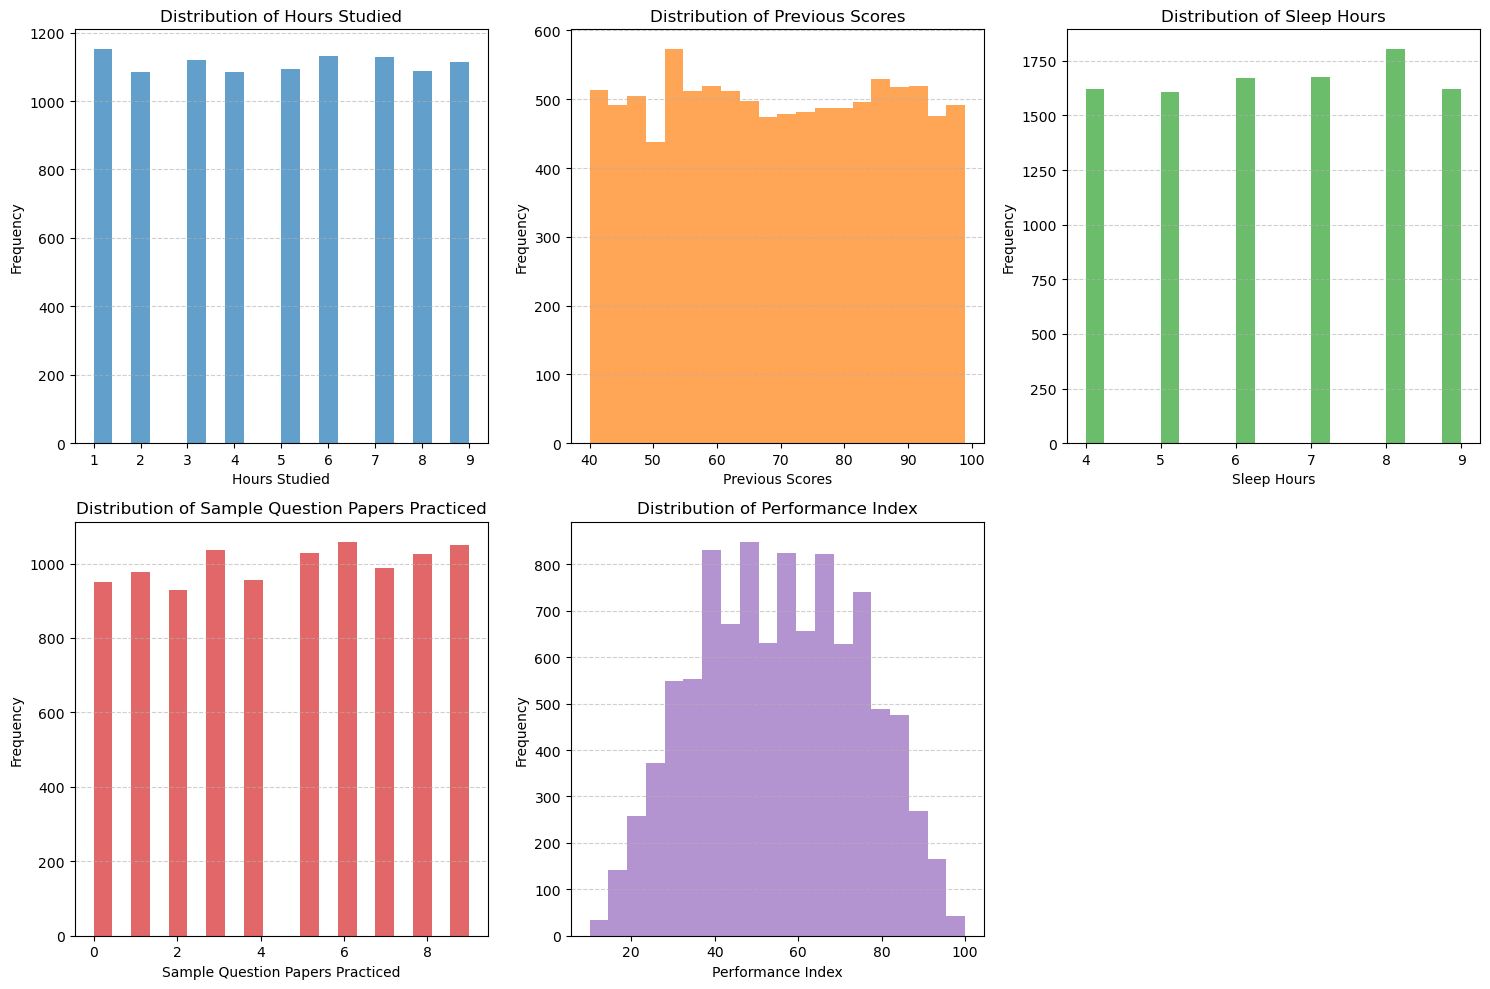

In [7]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
n_cols = len(numerical_cols)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=20, alpha=0.7, color=f'C{i}')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# 1. Data Preprocessing


In [8]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


### After noticing that there were no missing values, I decided to check for excess or illogical data entered by mistake.

In [9]:
# 2. Check for placeholders
placeholders = ["", " ", "NA", "N/A", "na", "null", "None"]
for col in df.columns:
    if df[col].dtype == 'object':
        count = df[col].isin(placeholders).sum()
        print(f"{col} placeholder count: {count}")

# 3. Check for unrealistic values
if "Sleep Hours" in df.columns:
    print("Unrealistic Sleep Hours:", df[(df["Sleep Hours"] < 3) | (df["Sleep Hours"] > 12)].shape[0])
if "Hours Studied" in df.columns:
    print("Unrealistic Hours Studied:", df[(df["Hours Studied"] < 0) | (df["Hours Studied"] > 24)].shape[0])
if "Previous Scores" in df.columns:
    print("Unrealistic Previous Scores:", df[(df["Previous Scores"] < 0) | (df["Previous Scores"] > 100)].shape[0])
if "Performance Index" in df.columns:
    print("Unrealistic Performance Index:", df[(df["Performance Index"] < 0) | (df["Performance Index"] > 100)].shape[0])


Extracurricular Activities placeholder count: 0
Unrealistic Sleep Hours: 0
Unrealistic Hours Studied: 0
Unrealistic Previous Scores: 0
Unrealistic Performance Index: 0


Perform feature engineering:


In [10]:
# Encode categorical variable
le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])

In [11]:
# Features & Target
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']


In [12]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.048051e-16,-1.296740e-16,3.268497e-17,1.648459e-16,-1.293188e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.542149e+00,-1.697914e+00,-9.896535e-01,-1.492294e+00,-1.598526e+00
25%,-7.697033e-01,-8.906381e-01,-9.896535e-01,-9.025945e-01,-9.009822e-01
50%,2.742182e-03,-2.570019e-02,-9.896535e-01,2.768051e-01,1.453332e-01
75%,7.751877e-01,8.969003e-01,1.010455e+00,8.665048e-01,8.428768e-01
max,1.547633e+00,1.704176e+00,1.010455e+00,1.456205e+00,1.540420e+00


# Identify correlations.


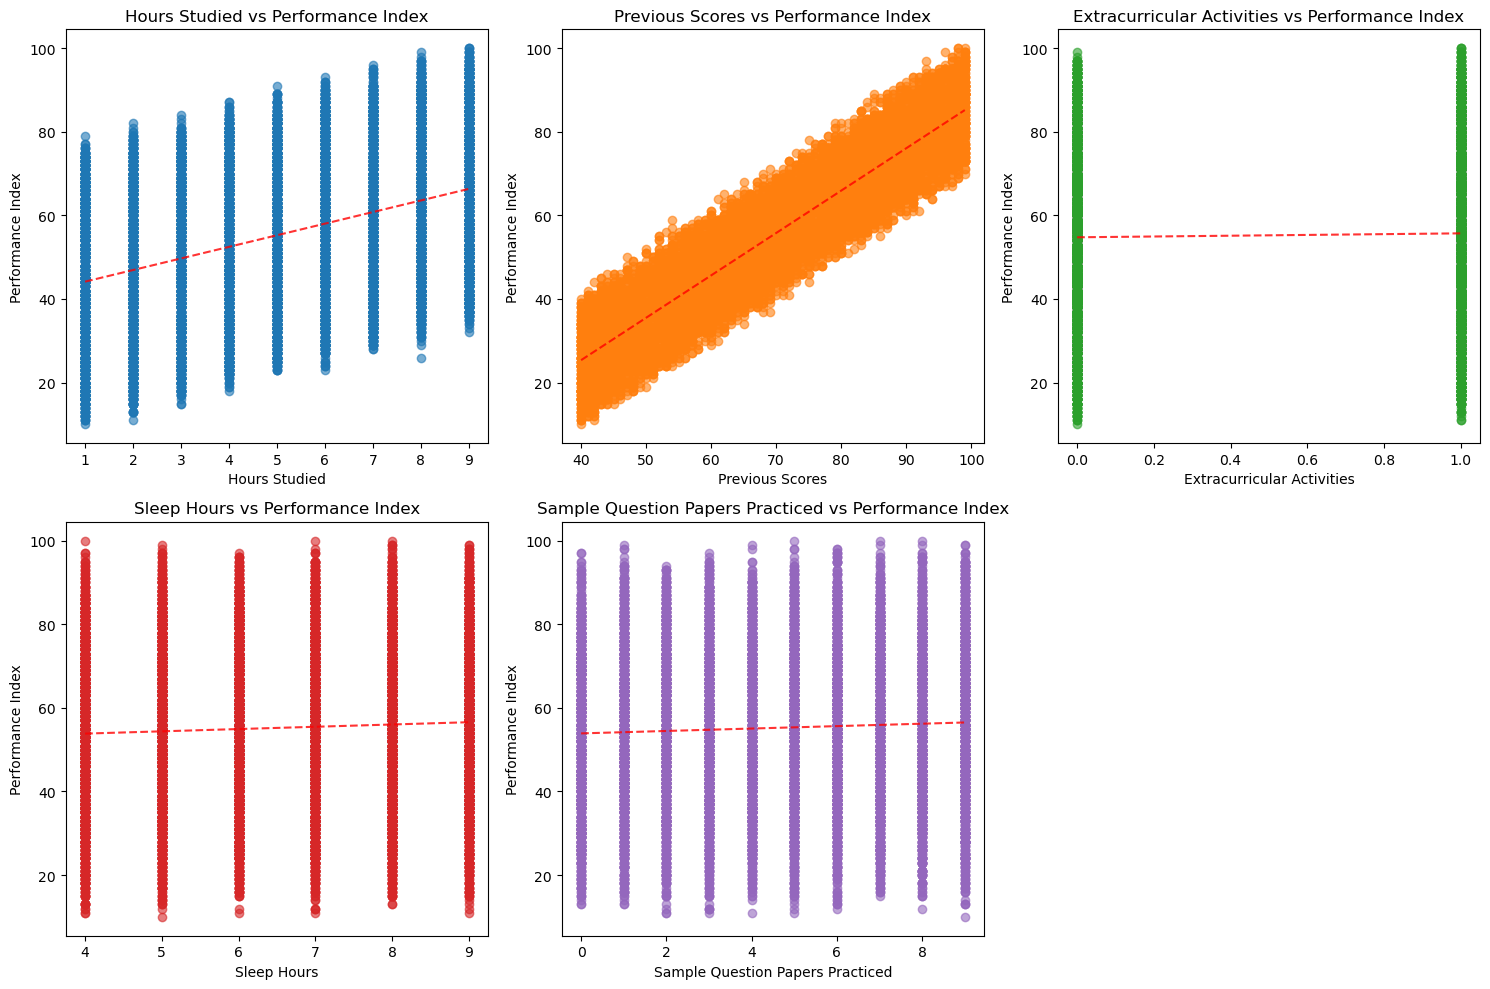

In [24]:
features_for_plotting =X_scaled_df

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_plotting):
    plt.subplot(2, 3, i+1)
    plt.scatter(df[feature], df['Performance Index'], alpha=0.6, color=f'C{i}')
    plt.xlabel(feature)
    plt.ylabel('Performance Index')
    plt.title(f'{feature} vs Performance Index')
    
    # Add trend line
    z = np.polyfit(df[feature], df['Performance Index'], 1)
    p = np.poly1d(z)
    plt.plot(df[feature].sort_values(), p(df[feature].sort_values()), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

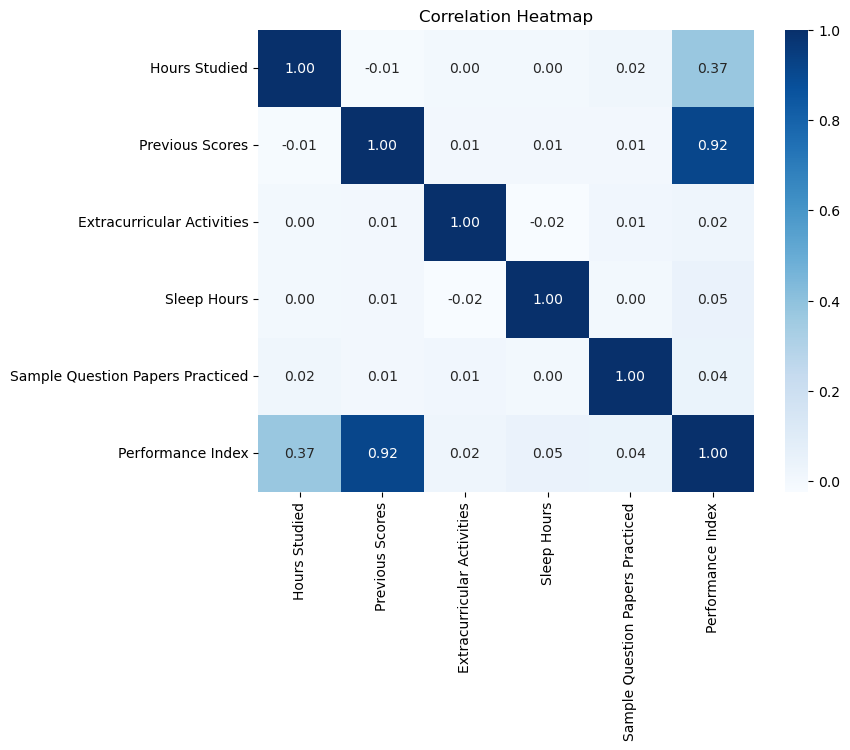

In [14]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# 2. Model Building



In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [16]:


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

In [17]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_df['Actual Performance Index'] = y_test.values
X_test_df['Predicted Performance Index'] = y_pred
X_test_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Actual Performance Index,Predicted Performance Index
0,0.002742,-0.025700,-0.989654,0.866505,-0.900982,51.0,54.711894
1,-1.155926,-1.351938,1.010455,-1.492294,1.191649,20.0,22.619676
2,0.775188,-0.775313,1.010455,0.276805,0.145333,46.0,47.904077
3,0.388965,-1.582588,1.010455,0.866505,0.145333,28.0,31.292795
4,0.775188,-0.948301,-0.989654,-1.492294,0.494105,41.0,43.006105


In [18]:

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [19]:
mae, r2


(1.611223228115541, 0.9889817178536919)

Another experiment with Hyperparameter Tuning

Alpha   |   MAE
-------------------
0.01    |   1.6111
0.1     |   1.6111
1       |   1.6112
10      |   1.6122
100     |   1.6315


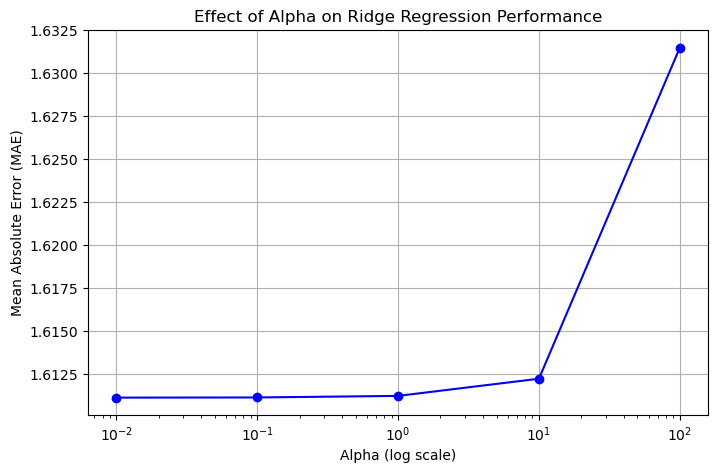

In [20]:
alphas = [0.01, 0.1, 1, 10, 100]
mae_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

print("Alpha   |   MAE")
print("-------------------")
for a, m in zip(alphas, mae_scores):
    print(f"{a:<7} |   {m:.4f}")

plt.figure(figsize=(8,5))
plt.plot(alphas, mae_scores, marker='o', linestyle='-', color='b')
plt.xscale('log')  
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Effect of Alpha on Ridge Regression Performance")
plt.grid(True)
plt.show()

conclousion :
 The model isn't very sensitive to a small value of α 

The larger α gets → the model over-compresses the coefficients → the result is slight underfitting (and consequently, the MAE increases).

The best performance actually occurred when α values ​​were between 0.01 and 1, and there isn't a significant difference between them → you can choose any of them as your final model.